In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

from matplotlib import colors
colorlist=list(colors.TABLEAU_COLORS)

from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [2]:
fileGA = "/content/GA_inflationV_primordial_Pk.dat"
k_GA,Pks_GA,Pkt_GA=np.loadtxt(fileGA,skiprows=2,unpack=True)

fileprior = "/content/GA_inflationV_primordial_Pk_staro.dat"
k_pr,Pks_pr,Pkt_pr=np.loadtxt(fileprior,skiprows=2,unpack=True)

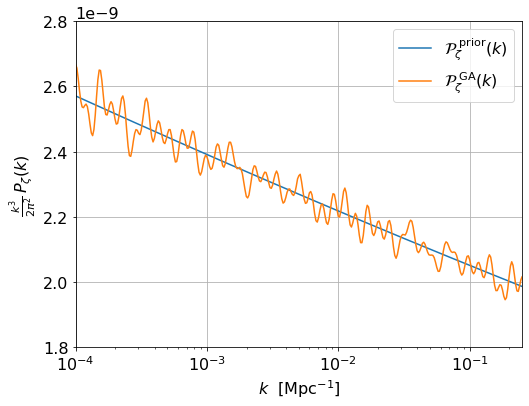

In [5]:
fig1 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.plot(k_pr, Pks_pr, color=colorlist[0], label=r'$\mathcal{P}_\zeta^\mathrm{~prior}(k)$')
plt.plot(k_GA, Pks_GA, color=colorlist[1], label=r'$\mathcal{P}_\zeta^\mathrm{~GA}(k)$')
plt.legend(loc='upper right')
plt.xscale("log")
#plt.yscale("log")
#plt.title(r'Title')
plt.xlabel(r'$k~~[\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$\frac{k^3}{2\pi^2}\,P_\zeta(k)$')
ax = plt.gca()
ax.set_ylim([1.8e-9,2.8e-9])
ax.set_xlim([1.e-4,2.5e-1])
plt.grid()
plt.show()
fig1.savefig('PS_GA_unbinned.pdf', bbox_inches='tight')

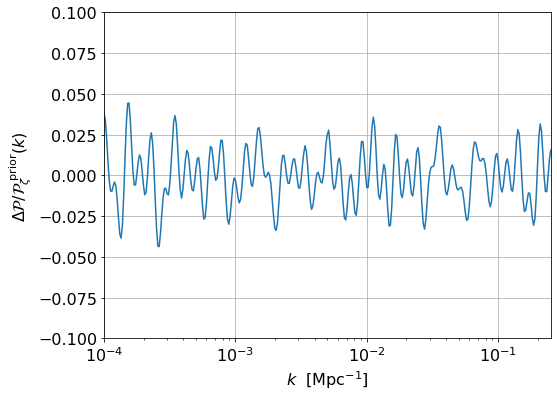

In [4]:
#Take the ratio
ratio = [Pks_GA[i]/Pks_pr[i]-1. for i in range(len(Pks_GA))] 

fig2 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.plot(k_GA, ratio, color=colorlist[0])#, label=r'$\mathcal{P}_\zeta^\mathrm{best-fit}(k)/\mathcal{P}_\zeta^\mathrm{prior}(k)$')
#plt.legend(loc='upper right')
plt.xscale("log")
#plt.yscale("log")
#plt.title(r'Title')
plt.xlabel(r'$k~~[\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$\Delta\mathcal{P}/\mathcal{P}_\zeta^\mathrm{~prior}(k)$')
ax = plt.gca()
ax.set_ylim([-0.1,0.1])
ax.set_xlim([1.e-4,2.5e-1])
plt.grid()
plt.show()
fig2.savefig('PS_GA_unbinned_relative.pdf', bbox_inches='tight')

fmax = 999.8000000000001
fmax = 1000.0


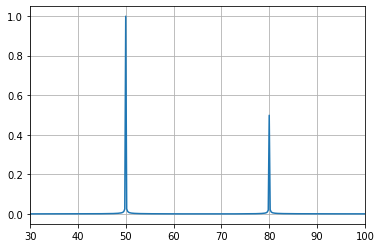

In [ ]:
# An example for doing FFTs

# Range of the data
x_min=0
x_max=5

# Number of points
N = 10000

# Make the points (x,y) with some frequencies (50, 80)Hz
x = np.linspace(x_min, x_max, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

# The sampling frequency
df = N/(x_max-x_min)

# The actual FFT
yf = fft(y)
xf = fftfreq(N, 1/df)[:N//2]

# The maximum frequency
print("fmax =",xf[-1])
print("fmax =",df/2)

# Make the plot
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
ax = plt.gca()
ax.set_xlim([30,100])
plt.grid()
plt.show()

In [ ]:
#This finds the peaks
datap = 2.0/N * np.abs(yf[0:N//2])
peaks, _ = find_peaks(datap, height=0.2)

print(xf[peaks])

[50. 80.]


In [ ]:
# The potential: VGA/Vprior-1
def VGA(varphi):
  return 3.96051334116646e-7*np.cos(245.12114839544753*varphi)**4+2.2722386453132797e-7*np.cos(298.82160302102835*varphi)**7+2.59832093801365e-7*np.cos(430.5197595586612*varphi)**4 + 1.2347111015518698e-7*np.sin(1631.3385874858482*varphi)
  #return np.sin(20*2*np.pi*varphi)
  #return np.sin(125.664*varphi)

In [ ]:
# Range:
varphi_min = 0
varphi_max = 1

# Number of sample points
N_tot=3000

# The values of the scalar field
varphis = np.linspace(varphi_min, varphi_max, N_tot)

# The values of the potential
Vs= VGA(varphis)

# The sampling rate
df = N_tot/(varphi_max-varphi_min)

# The FFT
yf = fft(Vs)
xf = fftfreq(N_tot, 1/df)[:N_tot//2]
print("fmax =",xf[-1])
print("fmax =",df/2)

omega =2*np.pi*xf

# The peak frequencies
data_fft = 2.0/N_tot * np.abs(yf[0:N_tot//2])
peaks, _ = find_peaks(data_fft,height = 0.002*max(data_fft))
omega_peak = omega[peaks]
print(1/omega_peak)

fmax = 1499.0
fmax = 1500.0
[0.00331573 0.00204045 0.00116171 0.00111297 0.00102022 0.00066872
 0.00061213 0.00058086 0.00047794]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


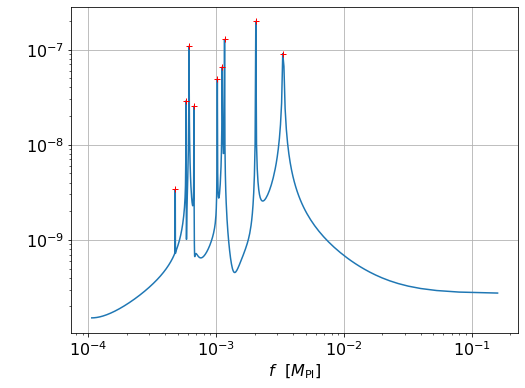

In [ ]:
fig3 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.plot(1/omega, data_fft)
plt.plot(1/omega_peak, data_fft[peaks],'r+')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$f~~[M_\mathrm{Pl}]$')
plt.ylabel(r'$~$')
ax = plt.gca()
#ax.set_xlim([2e-4,1.1e-2])
#ax.set_ylim([.7e-11,1.1e-6])
plt.grid()
plt.show()
fig3.savefig('TF_pot_GA_unbinned_SN.pdf', bbox_inches='tight')

In [ ]:
# Go to lnk
logk=np.log(k_GA)

# Print kmin, kmax
print("(lnk_min,lnk_max) =",[logk[0],logk[-1]])
print("lnk_max-lnk_min = ",logk[-1]-logk[0])

# Number of sample points
N_tot = len(logk)
print("N_tot =",N_tot)

# Rescale the power spectrum, aka DP/P
DP_over_P = (Pks_GA-Pks_pr)/Pks_pr

# The sample rate
df = N_tot/(logk[-1]-logk[0])

# Maximum frequency
print("fmax =",df/2)

# The FFT
yf = fft(DP_over_P)
xf = fftfreq(N_tot, 1/df)[:N_tot//2]

# This is omega_over_H
omega_over_H = 2*np.pi*xf

# Maximum frequency from the FFT
print("fmax =",xf[-1])
print("omega_max =",2*np.pi*xf[-1])

(lnk_min,lnk_max) = [-11.86006313953428, -0.6694995875831465]
lnk_max-lnk_min =  11.190563551951133
N_tot = 487
fmax = 21.759404597415873
fmax = 21.62536309065561
omega_max = 135.87616363363105


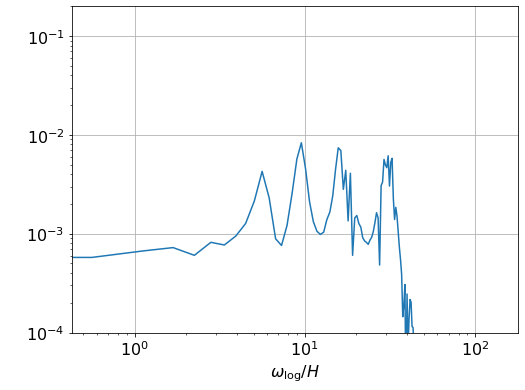

In [ ]:
fig4 = plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.plot(omega_over_H, 2.0/N_tot * np.abs(yf[0:N_tot//2]))
plt.xscale("log")
plt.yscale("log")
ax = plt.gca()
ax.set_ylim([1.e-4,2.e-1])
#ax.set_xlim([.5,150])
plt.xlabel(r'$\omega_\mathrm{log}/H$')
plt.ylabel(r'$~$')
plt.grid()
plt.show()
fig4.savefig('TF_Pk_GA_unbinned_SN.pdf', bbox_inches='tight')